In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [2]:
birth = pd.read_excel("data/chapter06.xlsx")

birth_clust = birth[["合計特殊出生率", "世帯年間収入"]]
birth_clust.head()

,合計特殊出生率,世帯年間収入
0,1.19,4488
1,1.28,4952
2,1.39,5282
3,1.27,5702
4,1.31,5274


In [3]:
# ステップ1
sc = StandardScaler()
birth_clust_sc = sc.fit_transform(birth_clust)

#ステップ2
clusmodel = KMeans(
    n_clusters=2,
    n_init=10,
    random_state=0
)
clusters = clusmodel.fit(birth_clust_sc)
birth_clust["cluster"] = clusters.labels_

birth_clust.head()

,合計特殊出生率,世帯年間収入,cluster
0,1.19,4488,1
1,1.28,4952,1
2,1.39,5282,1
3,1.27,5702,0
4,1.31,5274,0


In [4]:
birth_clust.groupby("cluster").mean()

,合計特殊出生率,世帯年間収入
cluster,,
0,1.344231,5802.038462
1,1.426667,4914.666667


In [5]:
col = [
    "合計特殊出生率s",
    "世帯年間収入s"
]

df = pd.DataFrame(birth_clust_sc, columns=col)
df.head()

,合計特殊出生率s,世帯年間収入s
0,-1.574334,-1.697093
1,-0.832749,-0.838885
2,0.073633,-0.228522
3,-0.915147,0.548304
4,-0.585554,-0.243319


In [6]:
birth_clust2 = pd.concat(
    [birth_clust, df],
    axis=1
)
birth_clust2.head()

,合計特殊出生率,世帯年間収入,cluster,合計特殊出生率s,世帯年間収入s
0,1.19,4488,1,-1.574334,-1.697093
1,1.28,4952,1,-0.832749,-0.838885
2,1.39,5282,1,0.073633,-0.228522
3,1.27,5702,0,-0.915147,0.548304
4,1.31,5274,0,-0.585554,-0.243319


<Axes: xlabel='合計特殊出生率s', ylabel='世帯年間収入s'>

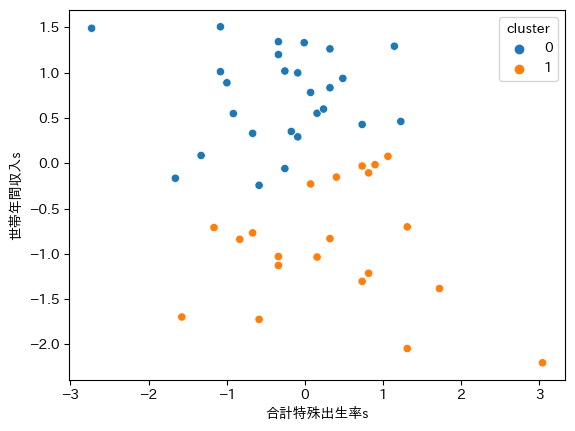

In [7]:
sns.scatterplot(
    x="合計特殊出生率s",
    y="世帯年間収入s",
    hue="cluster",
    data=birth_clust2
)

In [8]:
pref = birth["都道府県"]
birth_clust_c2 = pd.concat(
    [birth_clust2, pref],
    axis=1
)
birth_clust_c2 = birth_clust_c2.drop(
    columns=[
        "合計特殊出生率", 
        "世帯年間収入", 
        "合計特殊出生率s", 
        "世帯年間収入s"]
)
birth_clust_c2

,cluster,都道府県
0,1,北海道
1,1,青森
2,1,岩手
3,0,宮城
4,0,秋田
5,0,山形
6,1,福島
7,0,茨城
8,0,栃木
9,0,群馬


In [9]:
clusmodel3 = KMeans(
    n_clusters=3,
    n_init=10,
    random_state=0
)
clusters = clusmodel3.fit(birth_clust_sc)
birth_clust["cluster3"] = clusters.labels_
birth_clust.head()

,合計特殊出生率,世帯年間収入,cluster,cluster3
0,1.19,4488,1,0
1,1.28,4952,1,0
2,1.39,5282,1,0
3,1.27,5702,0,1
4,1.31,5274,0,0


In [10]:
birth_clust.groupby("cluster3").mean()

,合計特殊出生率,世帯年間収入,cluster
cluster3,,,
0,1.296154,5008.846154,0.692308
1,1.350476,5894.380952,0.000000
2,1.515385,5012.615385,0.923077


In [11]:
birth_clust3 = pd.concat(
    [birth_clust, df],
    axis=1
)
birth_clust3.head()

,合計特殊出生率,世帯年間収入,cluster,cluster3,合計特殊出生率s,世帯年間収入s
0,1.19,4488,1,0,-1.574334,-1.697093
1,1.28,4952,1,0,-0.832749,-0.838885
2,1.39,5282,1,0,0.073633,-0.228522
3,1.27,5702,0,1,-0.915147,0.548304
4,1.31,5274,0,0,-0.585554,-0.243319


<Axes: xlabel='合計特殊出生率s', ylabel='世帯年間収入s'>

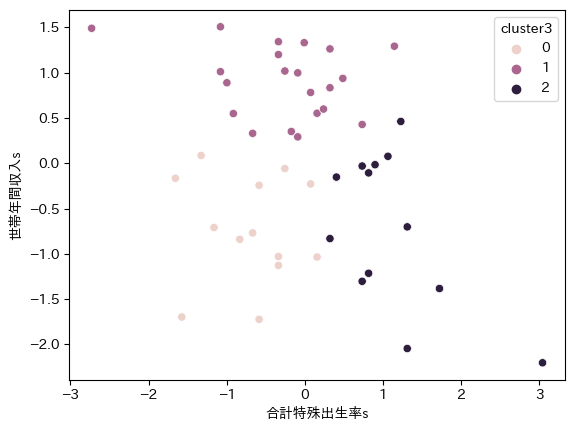

In [12]:
sns.scatterplot(
    x="合計特殊出生率s",
    y="世帯年間収入s",
    hue="cluster3",
    data=birth_clust3
)

In [13]:
birth_clust_d3 = pd.concat(
    [birth_clust3, pref],
    axis=1
)
birth_clust_d3.head()

,合計特殊出生率,世帯年間収入,cluster,cluster3,合計特殊出生率s,世帯年間収入s,都道府県
0,1.19,4488,1,0,-1.574334,-1.697093,北海道
1,1.28,4952,1,0,-0.832749,-0.838885,青森
2,1.39,5282,1,0,0.073633,-0.228522,岩手
3,1.27,5702,0,1,-0.915147,0.548304,宮城
4,1.31,5274,0,0,-0.585554,-0.243319,秋田


In [14]:
birth_clust_d32 = birth_clust_d3[[
    "合計特殊出生率",
    "世帯年間収入",
    "cluster3",
    "都道府県"
]]
birth_clust_d32.head()

,合計特殊出生率,世帯年間収入,cluster3,都道府県
0,1.19,4488,0,北海道
1,1.28,4952,0,青森
2,1.39,5282,0,岩手
3,1.27,5702,1,宮城
4,1.31,5274,0,秋田


In [15]:
birth_clust_d33 = birth_clust_d32.drop(
    columns=["合計特殊出生率", "世帯年間収入"]
)
birth_clust_d33

,cluster3,都道府県
0,0,北海道
1,0,青森
2,0,岩手
3,1,宮城
4,0,秋田
5,1,山形
6,2,福島
7,1,茨城
8,1,栃木
9,1,群馬


In [16]:
clusmodel4 = KMeans(
    n_clusters=4,
    n_init=10,
    random_state=0
)
clusters = clusmodel4.fit(birth_clust_sc)
birth_clust["cluster4"] = clusters.labels_

birth_clust.head()

,合計特殊出生率,世帯年間収入,cluster,cluster3,cluster4
0,1.19,4488,1,0,3
1,1.28,4952,1,0,3
2,1.39,5282,1,0,2
3,1.27,5702,0,1,1
4,1.31,5274,0,0,3


In [17]:
birth_clust.groupby("cluster4").mean()

,合計特殊出生率,世帯年間収入,cluster,cluster3
cluster4,,,,
0,1.561667,4608.166667,1.00000,2.000000
1,1.222500,5790.375000,0.00000,0.750000
2,1.418696,5714.869565,0.26087,1.173913
3,1.313000,4864.700000,0.90000,0.200000


In [18]:
birth_clust4 = pd.concat(
    [birth_clust, df],
    axis=1
)
birth_clust4.head()

,合計特殊出生率,世帯年間収入,cluster,cluster3,cluster4,合計特殊出生率s,世帯年間収入s
0,1.19,4488,1,0,3,-1.574334,-1.697093
1,1.28,4952,1,0,3,-0.832749,-0.838885
2,1.39,5282,1,0,2,0.073633,-0.228522
3,1.27,5702,0,1,1,-0.915147,0.548304
4,1.31,5274,0,0,3,-0.585554,-0.243319


<Axes: xlabel='合計特殊出生率s', ylabel='世帯年間収入s'>

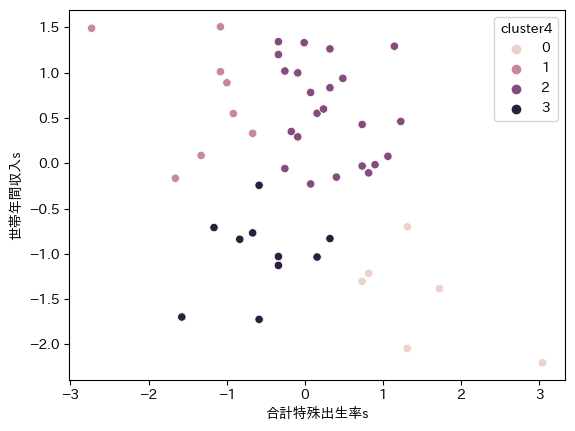

In [19]:
sns.scatterplot(
    x="合計特殊出生率s",
    y="世帯年間収入s",
    hue="cluster4",
    data=birth_clust4
)

In [20]:
birth_clust_e = pd.concat(
    [birth_clust4, pref],
    axis=1
)
birth_clust_e.head()

birth_clust_e2 = birth_clust_e[[
    "合計特殊出生率",
    "世帯年間収入",
    "cluster4",
    "都道府県"
]]
birth_clust_e2.head()

,合計特殊出生率,世帯年間収入,cluster4,都道府県
0,1.19,4488,3,北海道
1,1.28,4952,3,青森
2,1.39,5282,2,岩手
3,1.27,5702,1,宮城
4,1.31,5274,3,秋田


In [21]:
birth_clust_e3 = birth_clust_e2.drop(
    columns=["合計特殊出生率", "世帯年間収入"]
)
birth_clust_e3

,cluster4,都道府県
0,3,北海道
1,3,青森
2,2,岩手
3,1,宮城
4,3,秋田
5,2,山形
6,2,福島
7,2,茨城
8,2,栃木
9,2,群馬
